In [1]:
import pandas as pd

df = pd.read_excel('C:/Users/kevir/Desktop/adaKami-reviews.xlsx')
print(df.head())

   Unnamed: 0                date   
0           0 2020-08-31 01:32:47  \
1           1 2020-02-07 07:52:55   
2           2 2022-08-06 06:31:01   
3           3 2020-02-28 14:30:26   
4           4 2021-06-05 05:39:20   

                                              review  rating  isEdited   
0  Udah bunga gede, belom jatuh tempo udah dikata...       1     False  \
1  Jatuh tempo tgl 26 belum ada telat sama sekali...       1     False   
2  Penyebaran Data Pribadi seperti Informasi Elek...       1     False   
3  Baru juga daftar pas minta naikin limit melalu...       1     False   
4  sudah tidak lagi pake aplikasi ini.. barusan s...       1     False   

          userName                                              title  
0         dodol !!  Jangan pinjam di sini. Mending gadai barang. S...  
1        bruno-dos                                  Belum jatuh tempo  
2  dewi nur atikah                            Jangan Pinjem disini 馃槉  
3        tiarsyifa                          

In [2]:
import nltk
import os
import re
from nltk import sent_tokenize
from nltk import word_tokenize

def preprocess(doc):
    sents = word_tokenize(doc)
    sents_tok = list()
    for s in sents:
        s = s.strip().lower()
        s = s.replace("\n", " ")
        s = re.sub(r' [^a-zA-Z0-9 ]', ' ', s)
        s = re.sub(' +', ' ', s)
        sents_tok.append(s)
    return " ".join(sents_tok)

docs_clear = list()
for d in df["review"]:
    docs_clear.append(preprocess(d))

In [3]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

kalimat = []
for i in docs_clear:
    stop = stopword.remove(i)
    kalimat.append(stop)

In [4]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

hasil_stem = []
for i in kalimat:
    stemmers = stemmer.stem(i)
    hasil_stem.append(stemmers)
print(hasil_stem)

['udah bunga gede bom jatuh tempo udah dikata2in ga mao bayar bkin sakit hati pas mao bayar sulit mungkin biar dapet bunga riba tambah kali taik lah edit bgsd mau bayar pas jatoh tempo gagal terus pas cek mutasi kena biaya admin transfer antar bank sampe 4x review bintang 5 bot semua aplikasi sial', 'jatuh tempo tgl 26 telat sama sekali sudah ada tagih lalu sms turut kurang sopan ancam bahasa kurang pantas', 'sebar data pribadi informasi elektronik dokumen elektronik isi ancam tindak keras kata kasar maupun kotor tindak lapor pihak polisi sudah langgar atur upa sanksi atur pasal 48 ayat 2 uu ite ancam usaha pinjam online anda lalu media elektronik jerat pasal 29 jo pasal 45b uu ite laku ancam dapat proses pidana', 'baru daftar pas minta naikin limit lalu aplikasi gojek malah aplikasi saya keluar sendiri abis ada nomor telepon engga jelas masuk angkat malah mati ya kalau mau niat pinjemin engga sebar data', 'pake aplikasi barusan umur pake aplikasi pinjam online kayak gin pernah sekali 

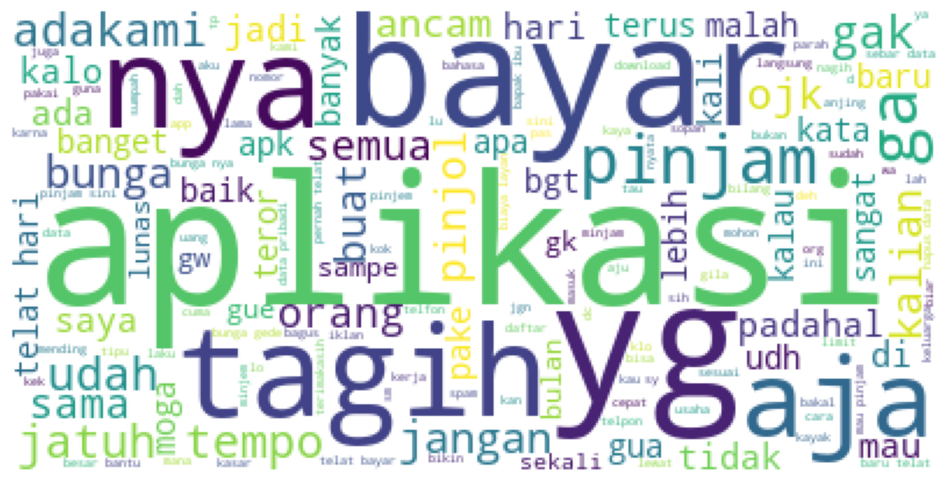

In [5]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

hasil_string = ' '.join(hasil_stem)
wordcloud = WordCloud(background_color="white").generate(hasil_string)

# Plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

# To remove the axis value
plt.axis("off")
plt.show()

In [6]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Tokenize the text into words
tokens = word_tokenize(hasil_string)

# Filter out words of length 1 or less
filtered_words = [word for word in tokens if len(word) > 1]

# Create a frequency distribution
fdist = FreqDist(filtered_words)

# Display the most common words
print(fdist.most_common(10))

[('aplikasi', 665), ('bayar', 596), ('pinjam', 579), ('nya', 479), ('yg', 471), ('bunga', 420), ('ga', 407), ('mau', 399), ('tagih', 398), ('jangan', 345)]


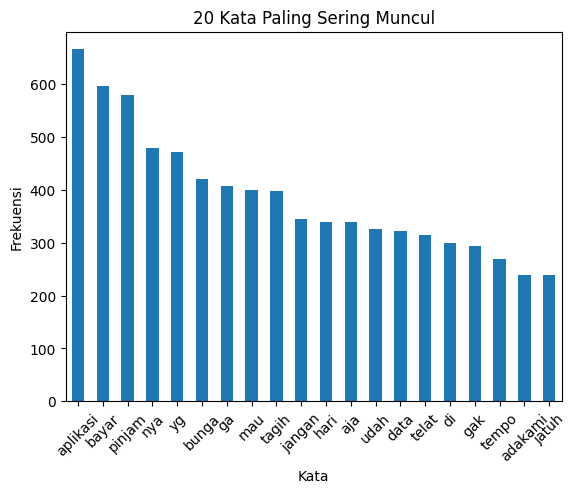

In [7]:
import pandas as pd

df_freq_tokens = pd.DataFrame.from_dict(fdist, orient='index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'

df_top_20 = df_freq_tokens.sort_values(by='Frequency', ascending=False).head(20)

df_top_20.plot(kind='bar', legend=False)
plt.title('20 Kata Paling Sering Muncul')
plt.ylabel('Frekuensi')
plt.xlabel('Kata')
plt.xticks(rotation=45)
plt.show()

# Ekstraksi Fitur

In [8]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np

tokenized_docs = [doc.split() for doc in hasil_stem]

model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=2, sg=0)

def document_vector(doc):
    word_vectors = [model.wv[word] for word in doc if word in model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

doc_vectors = np.array([document_vector(doc) for doc in tokenized_docs])
doc_vectors = np.nan_to_num(doc_vectors)
doc_vectors

array([[-0.14944361,  0.18489029,  0.18716171, ..., -0.28187186,
         0.23412064, -0.04716513],
       [-0.16590528,  0.20926954,  0.20950575, ..., -0.31328437,
         0.26665443, -0.05127085],
       [-0.11243521,  0.12892564,  0.13781501, ..., -0.20827933,
         0.17743063, -0.03645165],
       ...,
       [-0.14910321,  0.18252321,  0.19140579, ..., -0.28673634,
         0.2402501 , -0.04632047],
       [-0.00392319,  0.01009899,  0.00386566, ..., -0.007704  ,
         0.00466742, -0.00142351],
       [-0.20917574,  0.24766894,  0.26312032, ..., -0.39892203,
         0.33172011, -0.06143416]])

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(hasil_stem)

# KMeans

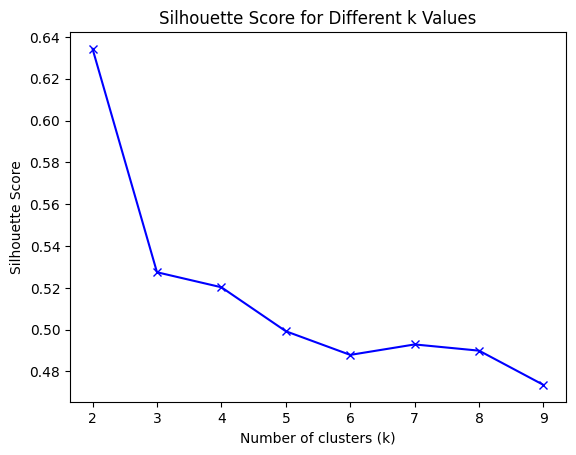

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, init='random', n_init=10, random_state=48)
    km.fit(doc_vectors)
    labels = km.labels_
    silhouette_avg = silhouette_score(doc_vectors, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 10), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, init='random', n_init=10, random_state=48)
kmeans.fit(doc_vectors)

labels = kmeans.labels_
print(labels)

[2 0 2 ... 2 1 0]


In [12]:
from sklearn.metrics import silhouette_score

silhouette_km = silhouette_score(doc_vectors, labels)
print(f'Silhouette Score: {silhouette_km:.3f}')

Silhouette Score: 0.527


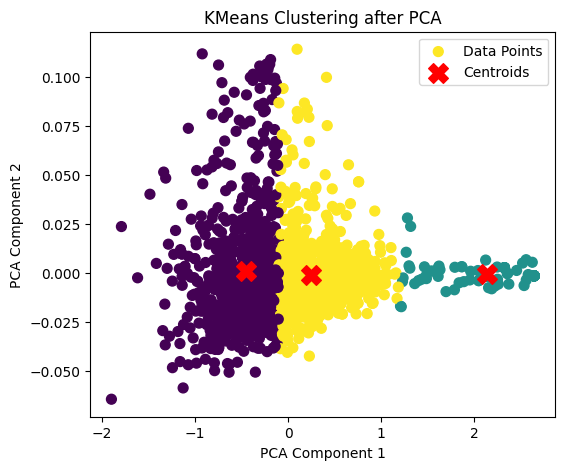

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(doc_vectors)

# Fit KMeans to the original data (doc_vectors) and get labels
kmeans = KMeans(n_clusters=3, n_init=10, random_state=48)
labels = kmeans.fit_predict(doc_vectors)

# Transform the centroids to the PCA-reduced space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot the data points and centroids in PCA space
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis', label='Data Points')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering after PCA')
plt.legend()
plt.show()

# WordCloud per Cluster

In [20]:
# Menampilkan judul dokumen per cluster
clusters = {i: [] for i in range(3)}
for idx, label in enumerate(labels):
    clusters[label].append(hasil_stem[idx])

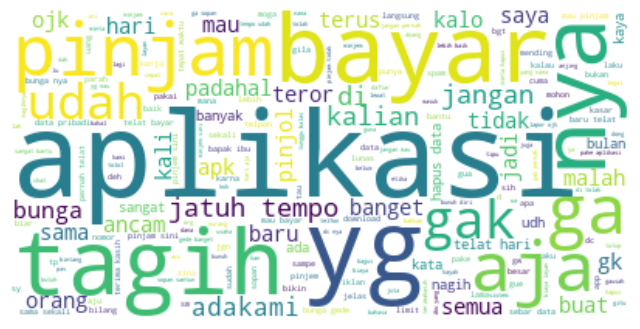

In [16]:
cluster_text = ' '.join(clusters[0])
wordcloud = WordCloud(background_color="white").generate(cluster_text)

# Plot the WordCloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

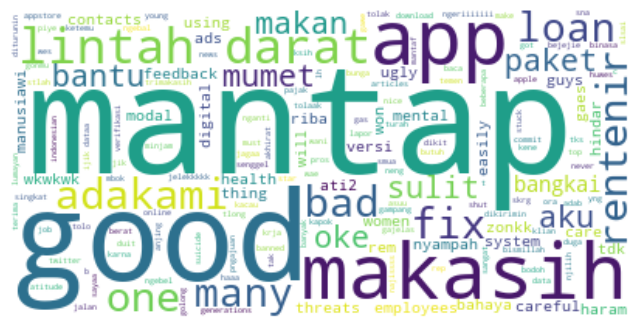

In [17]:
cluster_text = ' '.join(clusters[1])
wordcloud = WordCloud(background_color="white").generate(cluster_text)

# Plot the WordCloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

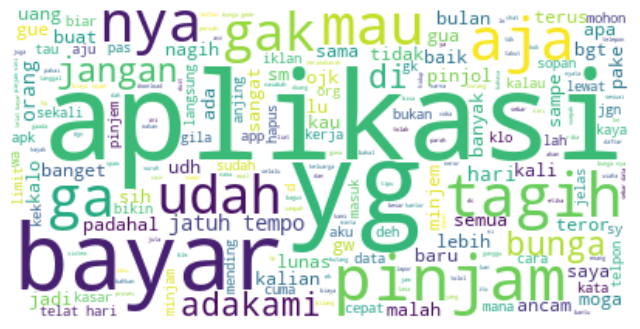

In [18]:
cluster_text = ' '.join(clusters[2])
wordcloud = WordCloud(background_color="white").generate(cluster_text)

# Plot the WordCloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()